## Load parquet

In [2]:
%matplotlib widget
%matplotlib inline

In [3]:

import pandas as pd

import matplotlib.pyplot as plt
import pandas_ta as ta

In [4]:
df = pd.read_parquet("data.parquet")

In [5]:
df.head()

,name,id,figi,ts,open_price,close_price,high_price,low_price,volume
0,JPMorgan,1,BBG000DMBXR2,2018-01-23 21:45:00+00:00,114.02,114.02,114.02,114.02,6.0
1,JPMorgan,1,BBG000DMBXR2,2018-01-23 21:35:00+00:00,114.02,114.02,114.02,114.02,10.0
2,JPMorgan,1,BBG000DMBXR2,2018-01-23 20:55:00+00:00,114.20,114.23,114.26,114.16,76837.0
3,JPMorgan,1,BBG000DMBXR2,2018-01-23 20:50:00+00:00,114.37,114.21,114.39,114.19,34299.0
4,JPMorgan,1,BBG000DMBXR2,2018-01-23 20:45:00+00:00,114.33,114.36,114.41,114.31,27240.0


In [6]:
df.groupby("name").count()

,id,figi,ts,open_price,close_price,high_price,low_price,volume
name,,,,,,,,
AT&T,101134,101134,101134,101134,101134,101134,101134,101134
Apple,119367,119367,119367,119367,119367,119367,119367,119367
JPMorgan,85536,85536,85536,85536,85536,85536,85536,85536


## Analyze single stock

### Create dataset with sliding averages

In [7]:
sliding_window_df = df[df["id"] == 1].reset_index()

In [8]:
sliding_window_df.head()

,index,name,id,figi,ts,open_price,close_price,high_price,low_price,volume
0,0,JPMorgan,1,BBG000DMBXR2,2018-01-23 21:45:00+00:00,114.02,114.02,114.02,114.02,6.0
1,1,JPMorgan,1,BBG000DMBXR2,2018-01-23 21:35:00+00:00,114.02,114.02,114.02,114.02,10.0
2,2,JPMorgan,1,BBG000DMBXR2,2018-01-23 20:55:00+00:00,114.20,114.23,114.26,114.16,76837.0
3,3,JPMorgan,1,BBG000DMBXR2,2018-01-23 20:50:00+00:00,114.37,114.21,114.39,114.19,34299.0
4,4,JPMorgan,1,BBG000DMBXR2,2018-01-23 20:45:00+00:00,114.33,114.36,114.41,114.31,27240.0


In [9]:

# List of all indicators
sliding_window_df.ta.indicators()


Pandas TA - Technical Analysis Indicators - v0.2.23b0
Total Indicators: 123
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_doji, cdl_inside, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, decay, decreasing, dema, donchian, dpo, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, ichimoku, increasing, inertia, kama, kc, kdj, kst, kurtosis, linreg, log_return, long_run, macd, mad, massi, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvt, pwma, qstick, quantile, rma, roc, rsi, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, stdev, stoch, stochrsi, supertrend, swma, t3, tema, thermo, trend_return, trima, trix, true_range, tsi, ttm_trend, ui, uo, variance, vortex, vp, vwap, vwma, wcp, willr, wma, zlma, zscore


Add metrics

In [10]:
# Add MACD
sliding_window_df.ta.macd(append=True)

# Add RSI
sliding_window_df.ta.rsi(9, append=True)

# Add MFI
sliding_window_df.ta.mfi(append=True)

sliding_window_df.head()

,index,name,id,figi,ts,open_price,close_price,high_price,low_price,volume,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_9,MFI_14
0,0,JPMorgan,1,BBG000DMBXR2,2018-01-23 21:45:00+00:00,114.02,114.02,114.02,114.02,6.0,NaN,NaN,NaN,NaN,NaN
1,1,JPMorgan,1,BBG000DMBXR2,2018-01-23 21:35:00+00:00,114.02,114.02,114.02,114.02,10.0,NaN,NaN,NaN,NaN,NaN
2,2,JPMorgan,1,BBG000DMBXR2,2018-01-23 20:55:00+00:00,114.20,114.23,114.26,114.16,76837.0,NaN,NaN,NaN,100.000000,NaN
3,3,JPMorgan,1,BBG000DMBXR2,2018-01-23 20:50:00+00:00,114.37,114.21,114.39,114.19,34299.0,NaN,NaN,NaN,90.322581,NaN
4,4,JPMorgan,1,BBG000DMBXR2,2018-01-23 20:45:00+00:00,114.33,114.36,114.41,114.31,27240.0,NaN,NaN,NaN,94.672586,NaN


In [11]:
sliding_window_df.describe()

,index,id,open_price,close_price,high_price,low_price,volume,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_9,MFI_14
count,85536.000000,85536.0,85536.000000,85536.000000,85536.000000,85536.000000,85536.000000,85511.000000,85511.000000,85528.000000,85534.000000,8.552300e+04
mean,160824.458064,1.0,108.869357,108.868067,108.965903,108.769106,17384.196935,0.000945,-0.000004,0.000949,49.948045,4.893427e+01
std,89950.782007,0.0,12.836169,12.837386,12.816483,12.857599,23507.344659,0.331436,0.107139,0.309003,14.824603,2.128730e+01
min,0.000000,1.0,77.570000,77.250000,78.640000,76.930000,1.000000,-5.099767,-2.370230,-4.474312,3.121379,-2.910913e-10
25%,82402.750000,1.0,99.390000,99.390000,99.490000,99.280000,79.000000,-0.113025,-0.036314,-0.107513,39.692387,3.478548e+01
50%,169457.500000,1.0,108.110000,108.110000,108.200000,108.020000,12355.000000,0.000336,-0.000516,0.000513,50.179243,4.895652e+01
75%,238955.250000,1.0,115.510000,115.500000,115.590000,115.430000,24494.250000,0.120574,0.036310,0.115109,60.316225,6.299376e+01
max,305699.000000,1.0,141.240000,141.240000,141.240000,141.240000,515849.000000,3.564853,1.535910,3.143031,100.000000,1.000000e+02


Add RSI oversold and overbought

In [12]:
RSI_oversold_threshold = 30
RSI_overbouht_threshold = 70

sliding_window_df["RSI_oversold"] = sliding_window_df["RSI_9"] <= RSI_oversold_threshold
sliding_window_df["RSI_overbought"] = sliding_window_df["RSI_9"] >= RSI_overbouht_threshold

Add MFI oversold

In [13]:
MFI_oversold_threshold = 20
MFI_overbouht_threshold = 80

sliding_window_df["MFI_oversold"] = sliding_window_df["MFI_14"] <= MFI_oversold_threshold
sliding_window_df["MFI_overbought"] = sliding_window_df["MFI_14"] >= MFI_overbouht_threshold

Add MACD signal crossover and cross under

In [14]:
sliding_window_df["MACD_diff"] = sliding_window_df["MACD_12_26_9"].diff()
sliding_window_df["MACD_crossover"] = (sliding_window_df["MACD_diff"] >= 0) & (sliding_window_df["MACD_diff"].shift() <= 0)
sliding_window_df["MACD_crossunder"] = (sliding_window_df["MACD_diff"] <= 0) & (sliding_window_df["MACD_diff"].shift() >= 0)

Show MACD RSI

In [15]:
def color_zone(ax, points, alpha, color):
    start_point = 0
    end_point = 0
    for x in points:
        if start_point == 0:
            start_point = x
            end_point = x + 1
        else:
            if end_point == x:
                # Continue
                end_point += 1
            else:
                # Draw and reset
                ax.axvspan(start_point, end_point, alpha=alpha, color=color)
                start_point = 0
                end_point = 0

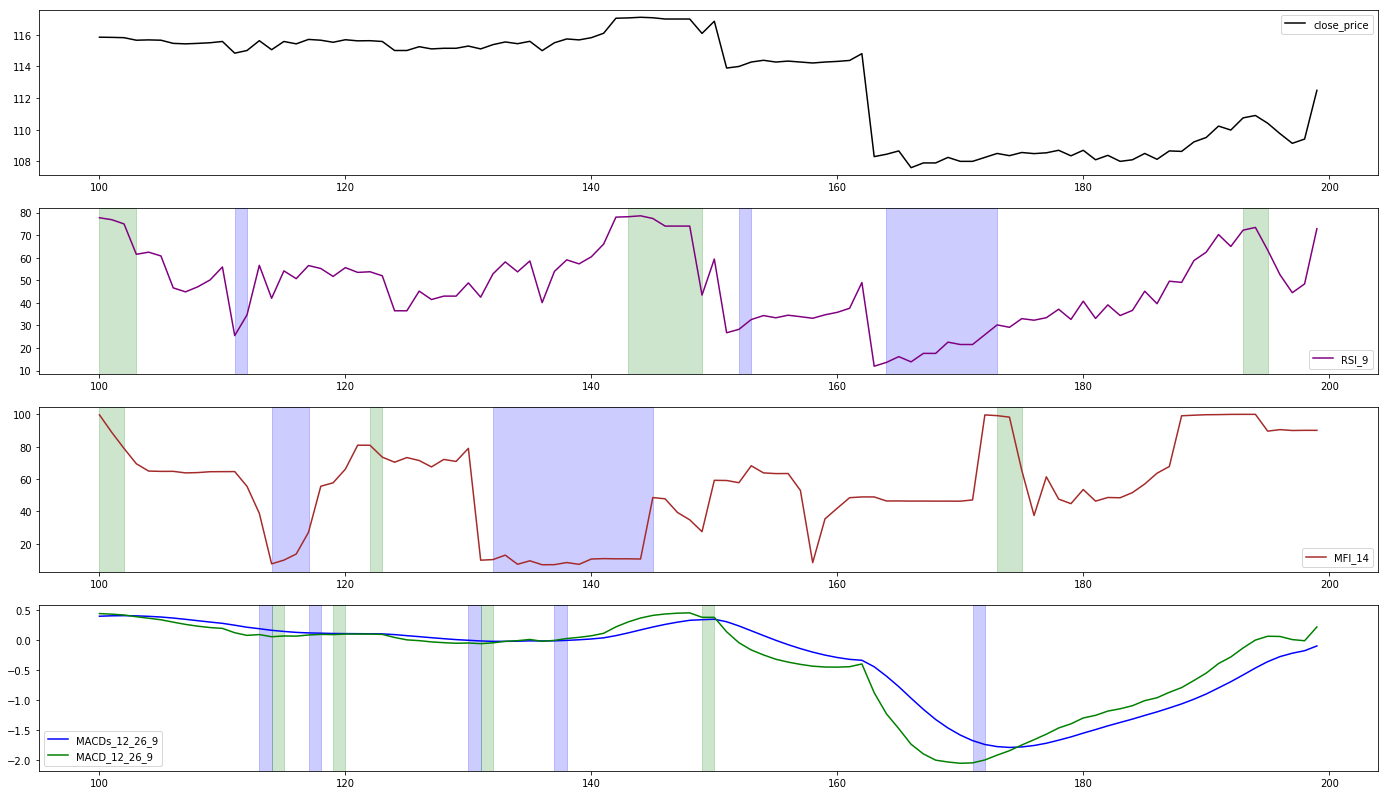

In [16]:
plot_df = sliding_window_df.iloc[100:200]

plt.figure(figsize=(24,14))
plt.subplot(4, 1, 1)
plot_df["close_price"].plot(color="black")
plt.legend()

plt.subplot(4, 1, 2)
ax1 = plot_df["RSI_9"].plot(color="purple")
# Show oversold zone
color_zone(ax1, plot_df[plot_df["RSI_oversold"]].index, 0.2, "blue")
# Show overbought zone
color_zone(ax1, plot_df[plot_df["RSI_overbought"]].index, 0.2, "green")
plt.legend()

plt.subplot(4, 1, 3)
ax2 = plot_df["MFI_14"].plot(color="brown")
# Show oversold zone
color_zone(ax2, plot_df[plot_df["MFI_oversold"]].index, 0.2, "blue")
# Show overbought zone
color_zone(ax2, plot_df[plot_df["MFI_overbought"]].index, 0.2, "green")
plt.legend()

plt.subplot(4, 1, 4)
# plot_df["MACDh_12_26_9"].plot(color="red",kind="bar")
plot_df["MACDs_12_26_9"].plot(color="blue")
ax3 = plot_df["MACD_12_26_9"].plot(color="green")
# Show crossover moments
color_zone(ax3, plot_df[plot_df["MACD_crossover"]].index, 0.2, "blue")            
# Show crossunder moments
color_zone(ax3, plot_df[plot_df["MACD_crossunder"]].index, 0.2, "green")
plt.legend()

# Create manual bot

In [25]:
import random

class TradingMRMBot:
    def __init__(self, stop_loss=0.05):
        # Stop loss
        self.stop_loss = stop_loss
        
        self.reset()
    
    def reset(self):
        # init flags
        # RSI
        self.rsi_oversold_flag = False
        self.rsi_overbought_flag = False
        # MFI
        self.mfi_oversold_flag = False
        self.mfi_overbought_flag = False
        # MACD
        self.macd_crossover_flag = False
        self.macd_crossunder_flag = False
        
        # Bought price
        self.balance = 0
        # Profit
        self.profit = 0
        
        self.current_step = 0
    
    def process(self, data):
        self.current_step += 1
        current_price = random.uniform(data["open_price"],data["close_price"])
            

        if self.balance == 0:
            # Try to find buy flag
            # BUY flags
            if (not self.rsi_oversold_flag) & (data["RSI_oversold"]):
                # Save True flag
                print("Step: %d set rsi_oversold_flag True" % (self.current_step))
                self.rsi_oversold_flag = True
                
            if (not self.mfi_oversold_flag) & (data["MFI_oversold"]):
                # Save True flag
                print("Step: %d set mfi_oversold_flag True" % (self.current_step))
                self.mfi_oversold_flag = True
            
            # Reset rsi flag if inverse MACD signal
            if self.rsi_oversold_flag & (data["MACD_crossunder"] | self.rsi_overbought_flag):
                print("Step: %d set rsi_oversold_flag False" % (self.current_step))
                self.rsi_oversold_flag = False
                
            # Reset mfi flag if inverse MACD signal
            if self.mfi_oversold_flag & (data["MACD_crossunder"] | self.mfi_overbought_flag):
                print("Step: %d set mfi_oversold_flag False" % (self.current_step))
                self.mfi_oversold_flag = False
            
            if self.rsi_oversold_flag & self.mfi_oversold_flag & data["MACD_crossover"]:
                # BUY Signal
                
                # Check that we can buy
                if self.balance == 0:
                    current_price = random.uniform(data["open_price"],data["close_price"])
                    print("Step: %d Buy with price=%f" % (self.current_step, current_price))

                    # Set balance
                    self.balance = current_price

                    # Reset flags
                    self.rsi_oversold_flag = False
                    self.mfi_oversold_flag = False
                else:
                    print("ERROR. Can't buy, if we already bought.")
        else:
            # SELL flags

            # Calc profit
            profit = (current_price - self.balance) / self.balance
            
            if (not self.rsi_overbought_flag) & (data["RSI_overbought"]):
                # Save True flag
                print("Step: %d set rsi_overbought_flag True" % (self.current_step))
                self.rsi_overbought_flag = True
                
            if (not self.mfi_overbought_flag) & (data["MFI_overbought"]):
                # Save True flag
                print("Step: %d set mfi_overbought_flag True" % (self.current_step))
                self.mfi_overbought_flag = True
            
            # Reset rsi flag if inverse MACD signal
            if self.rsi_overbought_flag & (data["MACD_crossover"] | self.rsi_oversold_flag):
                print("Step: %d set rsi_overbought_flag False" % (self.current_step))
                self.rsi_overbought_flag = False
                
            # Reset mfi flag if inverse MACD signal
            if self.mfi_overbought_flag & (data["MACD_crossover"] | self.mfi_oversold_flag):
                print("Step: %d set mfi_overbought_flag False" % (self.current_step))
                self.mfi_overbought_flag = False
            
            if self.rsi_overbought_flag & self.mfi_overbought_flag & data["MACD_crossunder"]:
                # SELL Signal
                
                # Check that we can sell
                if self.balance != 0:
                    self.profit += profit
                    
                    print("Step: %d Sell with price=%f and profit %.2f%%" % (self.current_step, current_price, profit * 100))
                    print("Overall Profit %.2f%%" % (self.profit * 100))
                    
                    # Set balance
                    self.balance = 0

                    # Reset flags
                    self.rsi_oversold_flag = False
                    self.mfi_oversold_flag = False
                else:
                    print("ERROR. Can't sell, if we already sold.")
                
                # Reset flags
                self.rsi_overbought_flag = False
                self.mfi_overbought_flag = False
        
            # Check stop-loss
            if profit <= -self.stop_loss:
                self.profit += profit
                
                print("Step: %d Stop loss from %.2f to %.2f with profit %.2f%%" % (self.current_step, self.balance, current_price, profit * 100))
                print("Overall Profit %.2f%%" % (self.profit * 100))

                # Set balance
                self.balance = 0

                # Reset flags
                self.rsi_oversold_flag = False
                self.mfi_oversold_flag = False

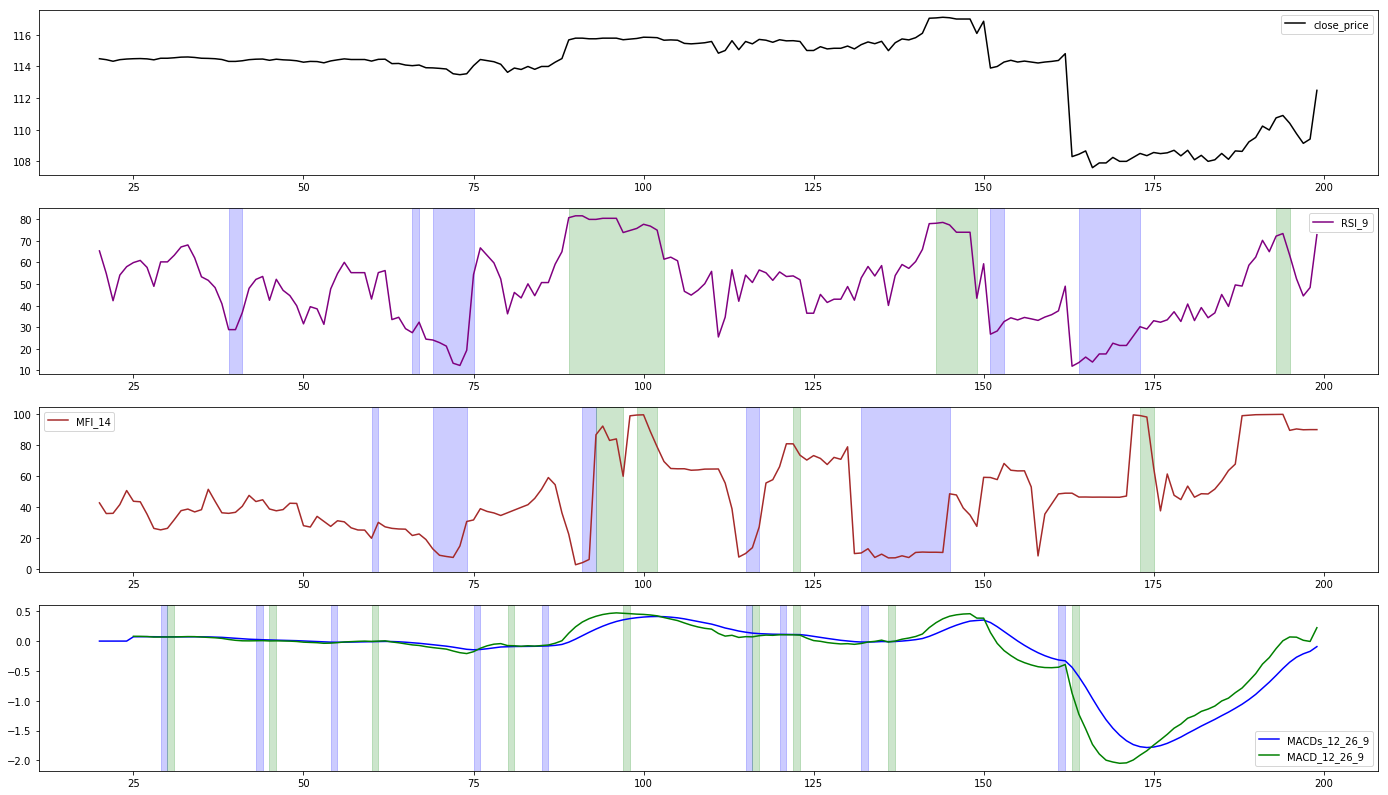

In [26]:
plot_df = sliding_window_df.iloc[20:200]

plt.figure(figsize=(24,14))
plt.subplot(4, 1, 1)
plot_df["close_price"].plot(color="black")
plt.legend()

plt.subplot(4, 1, 2)
ax1 = plot_df["RSI_9"].plot(color="purple")
# Show oversold zone
color_zone(ax1, plot_df[plot_df["RSI_oversold"]].index, 0.2, "blue")
# Show overbought zone
color_zone(ax1, plot_df[plot_df["RSI_overbought"]].index, 0.2, "green")
plt.legend()

plt.subplot(4, 1, 3)
ax2 = plot_df["MFI_14"].plot(color="brown")
# Show oversold zone
color_zone(ax2, plot_df[plot_df["MFI_oversold"]].index, 0.2, "blue")
# Show overbought zone
color_zone(ax2, plot_df[plot_df["MFI_overbought"]].index, 0.2, "green")
plt.legend()

plt.subplot(4, 1, 4)
# plot_df["MACDh_12_26_9"].plot(color="red",kind="bar")
plot_df["MACDs_12_26_9"].plot(color="blue")
ax3 = plot_df["MACD_12_26_9"].plot(color="green")
# Show crossover moments
color_zone(ax3, plot_df[plot_df["MACD_crossover"]].index, 0.2, "blue")            
# Show crossunder moments
color_zone(ax3, plot_df[plot_df["MACD_crossunder"]].index, 0.2, "green")
plt.legend()

In [27]:
# Test bot
bot = TradingMRMBot(stop_loss=0.05)

bot.reset()

for index, data in sliding_window_df.iloc[:200].iterrows():
    bot.process(data)

Step: 40 set rsi_oversold_flag True
Step: 46 set rsi_oversold_flag False
Step: 61 set mfi_oversold_flag True
Step: 61 set mfi_oversold_flag False
Step: 66 set rsi_oversold_flag True
Step: 69 set mfi_oversold_flag True
Step: 76 Buy with price=114.423858
Step: 90 set rsi_overbought_flag True
Step: 94 set mfi_overbought_flag True
Step: 98 Sell with price=115.690000 and profit 1.11%
Overall Profit 1.11%
Step: 112 set rsi_oversold_flag True
Step: 115 set mfi_oversold_flag True
Step: 115 set rsi_oversold_flag False
Step: 115 set mfi_oversold_flag False
Step: 116 set mfi_oversold_flag True
Step: 117 set mfi_oversold_flag False
Step: 132 set mfi_oversold_flag True
Step: 132 set mfi_oversold_flag False
Step: 133 set mfi_oversold_flag True
Step: 137 set mfi_oversold_flag False
Step: 138 set mfi_oversold_flag True
Step: 150 set mfi_oversold_flag False
Step: 152 set rsi_oversold_flag True
Step: 159 set mfi_oversold_flag True
Step: 162 Buy with price=114.370847
Step: 164 Stop loss from 114.37 to 10